**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import ppscore as pps
import seaborn as sns
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot
%matplotlib inline
sns.set_palette('husl')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [3]:
data = pd.read_excel("bankruptcy-prevention.xlsx")

In [4]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


**The data set includes the following variables:
industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
class: bankruptcy, non-bankruptcy (target variable).
**

**We need to have LOW(industrial risk,management risk,operating risk) and HIGH(financial flexibility,credibility,competitiveness) in ordere to avoid Bankruptcy**

In [5]:
data.tail(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
240,0.0,1.0,0.5,0.5,0.5,0.0,non-bankruptcy
241,1.0,0.0,0.5,0.5,0.5,1.0,non-bankruptcy
242,0.0,1.0,0.5,0.5,0.5,1.0,non-bankruptcy
243,0.0,1.0,1.0,1.0,1.0,0.0,non-bankruptcy
244,1.0,0.0,1.0,1.0,1.0,1.0,non-bankruptcy
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [6]:
type(data)
data.shape

(250, 7)

**250rows and 7 columns including one target variable**

In [7]:
#data types
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

**Here is no need to change any datatype as all of them are of float 64**

In [8]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

**Here all the columns **

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


**as we can see all here are non-null values hence we dont require coerce**

In [10]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])

**Using Label Encoder at a categorical column to get binary value as its a classification project
**

In [11]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


**OUTLIER DETECTION AND DATA VISUALIZATION**

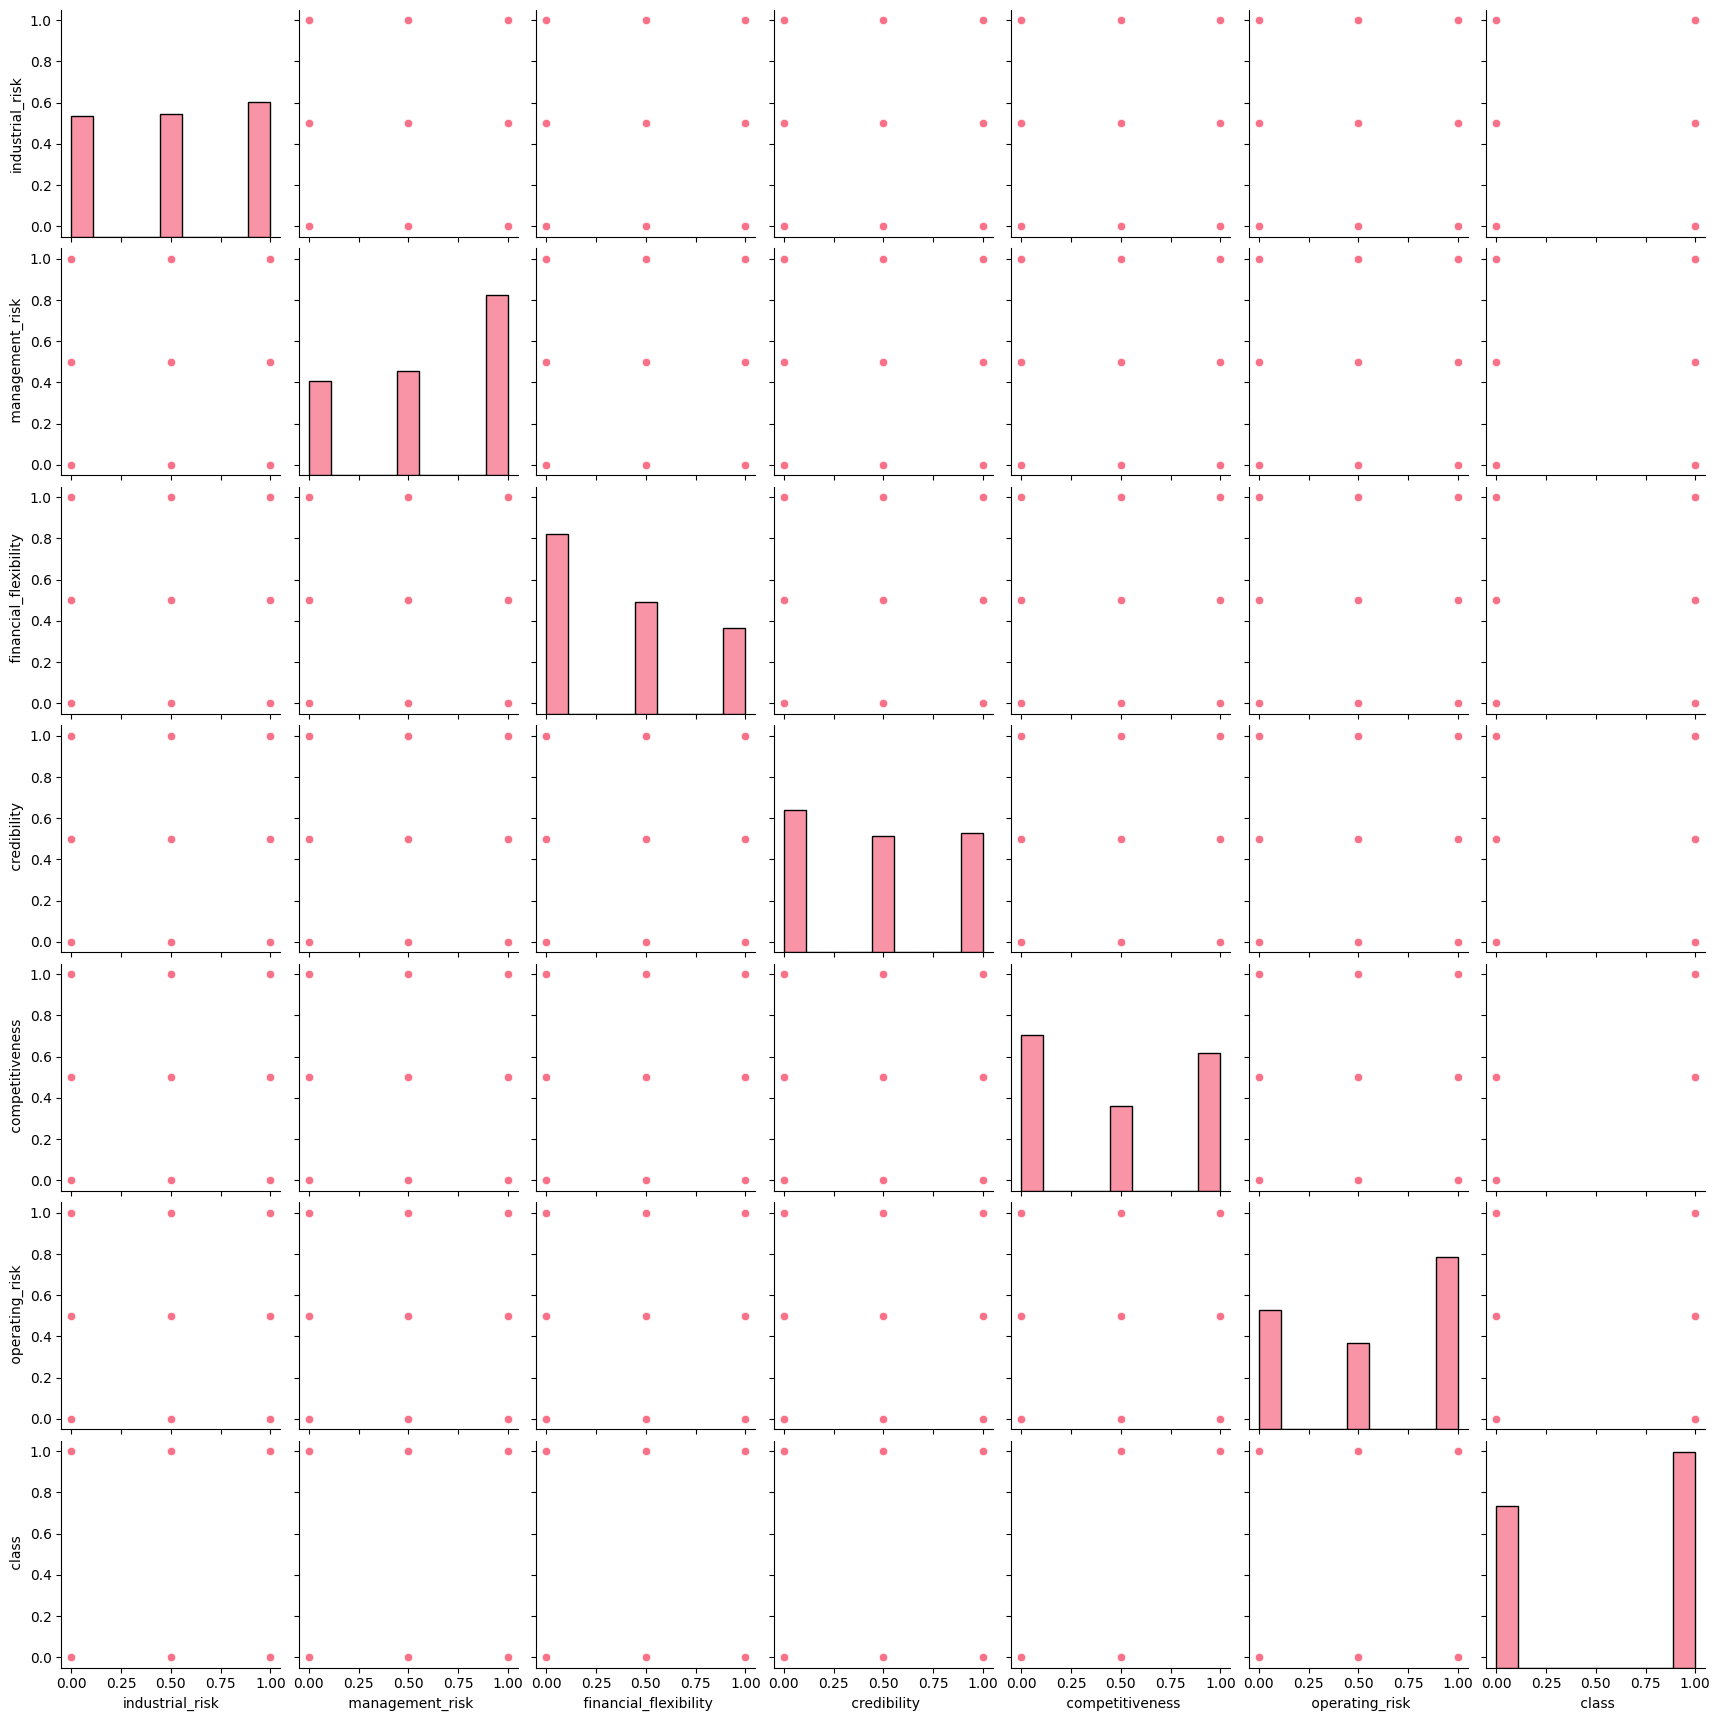

In [12]:

# Create the default pairplot
sns.pairplot(data)

In [13]:
#Correlation

data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


**IN this correlation matrix we can see no columns are correlated to each other neither input variables**

**OUTLIER DETECTION USING ISOLATION FOREST**

* Our algoritm can suffer a lot we dont remove the outliers and to avoid this problem we will drop the values**

In [14]:

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)
y_pred_outliers = clf.predict(data)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
data['scores']=clf.decision_function(data)
data['anomaly']=clf.predict(data.iloc[:,0:7])
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [16]:
#print the anomaly
data[data['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


**These are the outliers.
Now we will drop them and reset the index**

In [17]:
data = data.drop(data.index[[27, 72, 192]], axis=0)
data.reset_index(drop=True,inplace = True)
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


**Univariate Histogram**

<function matplotlib.pyplot.show(close=None, block=None)>

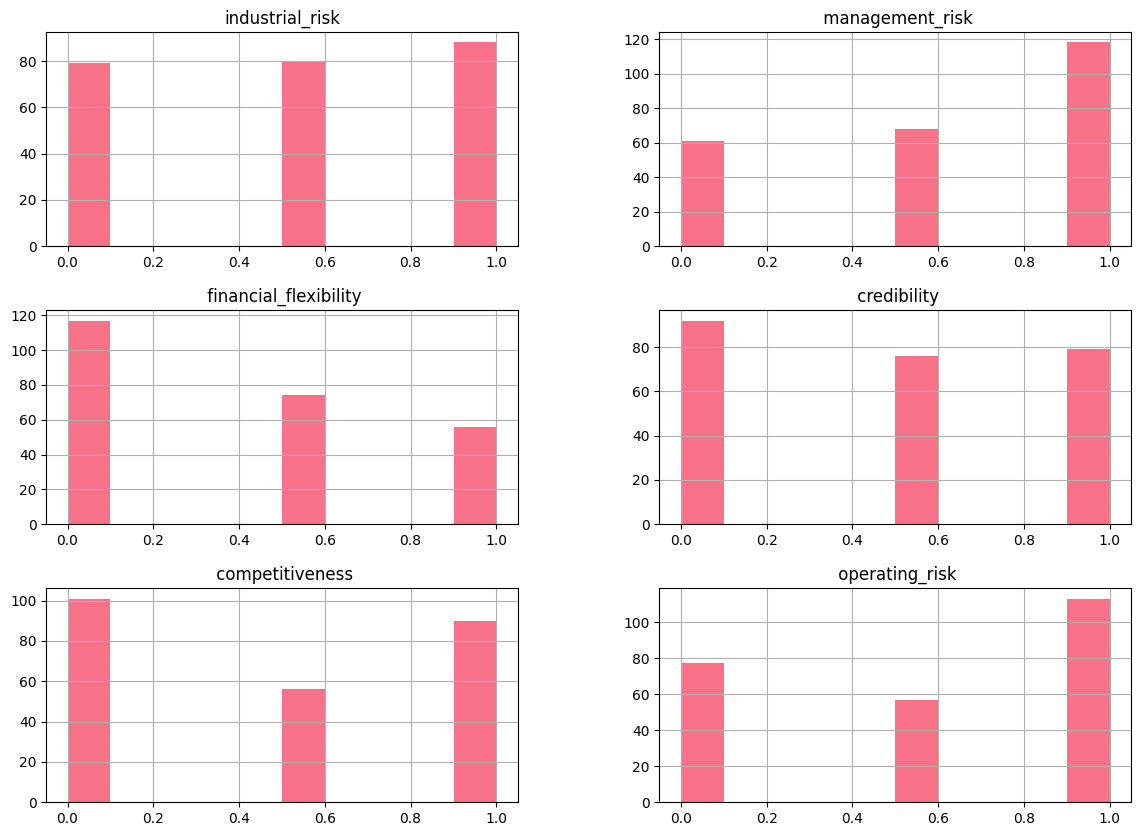

In [18]:
data1=data.iloc[0:,:6]
data1.hist(figsize=(14,10))
pyplot.show

By Looking at this histogram we can say that we have higher risks than credibility and competitiveness

**Recursive Feature Elimination**

In [19]:
array = data.values
X = array[:,0:6]
Y = array[:,-3]
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

In [20]:
fit.support_

array([False,  True,  True,  True,  True, False])

In [21]:
fit.ranking_

array([3, 1, 1, 1, 1, 2])

**By above results we can see that column no-0 and 5 less important as compared to other features but as per our domain knowledge we cant drop those columns.**

**PPS SCORE**

In [22]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [23]:
data2=data.iloc[:,0:7]

In [24]:
#calculate the whole PPS matrix
pps.matrix(data2)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,industrial_risk,management_risk,0.112190,regression,True,mean absolute error,0.362348,0.321696,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.005409,regression,True,mean absolute error,0.350202,0.348308,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346154,0.364014,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.006119,regression,True,mean absolute error,0.386640,0.384274,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000604,regression,True,mean absolute error,0.384615,0.384383,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.425101,0.466110,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338057,0.347358,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,management_risk,financial_flexibility,0.040381,regression,True,mean absolute error,0.350202,0.336061,DecisionTreeRegressor()


**as we can see that competitiveness ,credibility and financial flexibility are more important with respect to our target variable class**

                                             |                                             | [  0%]   00:00 ->…


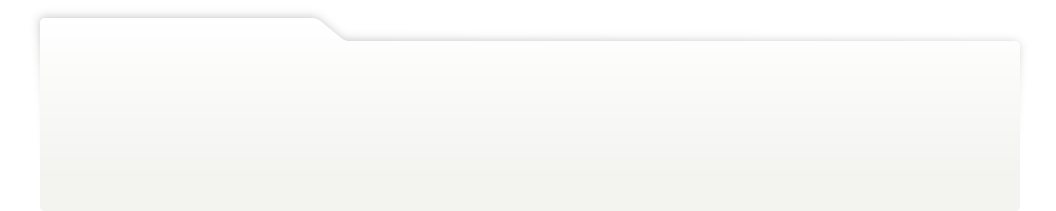
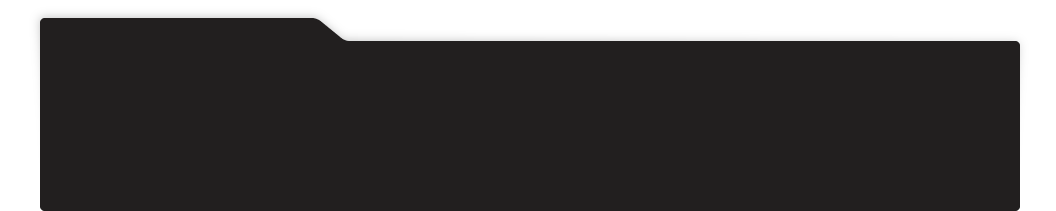
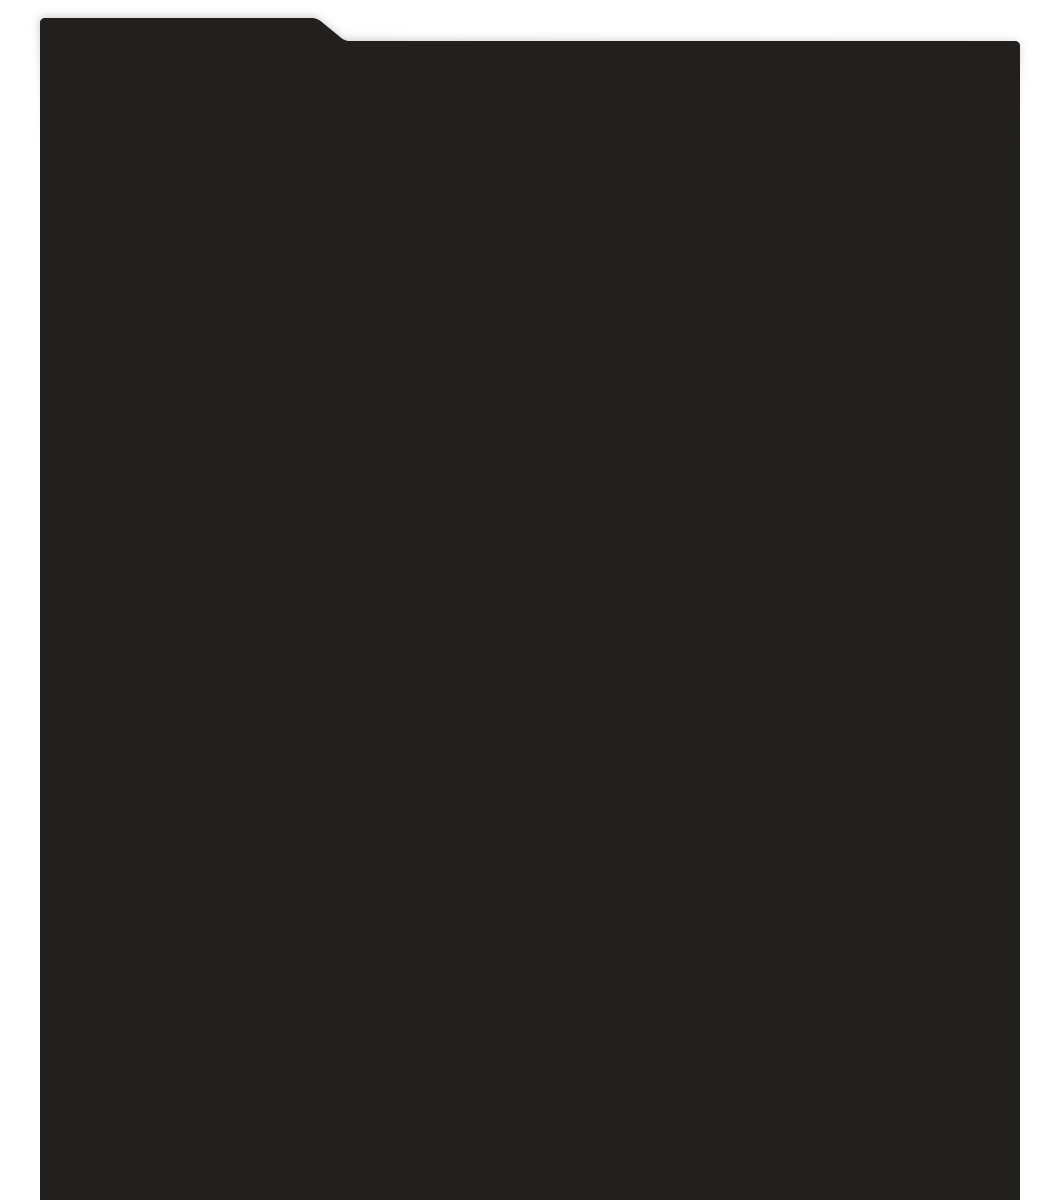
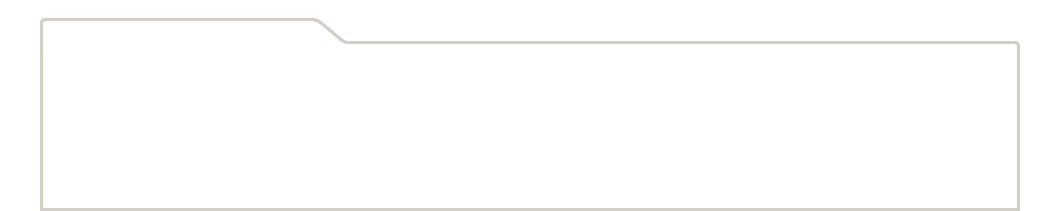
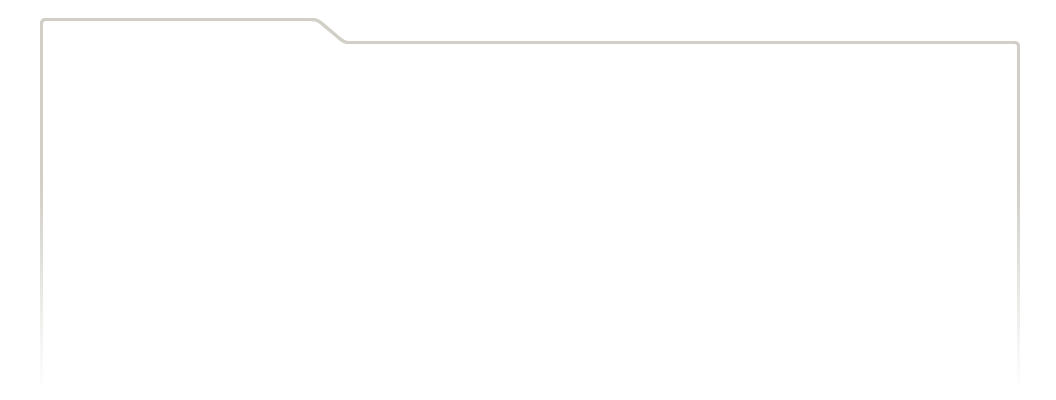
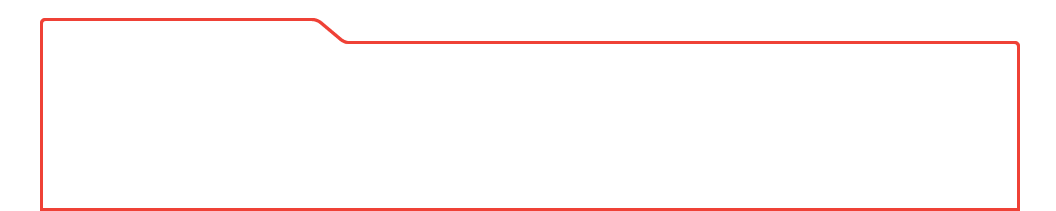
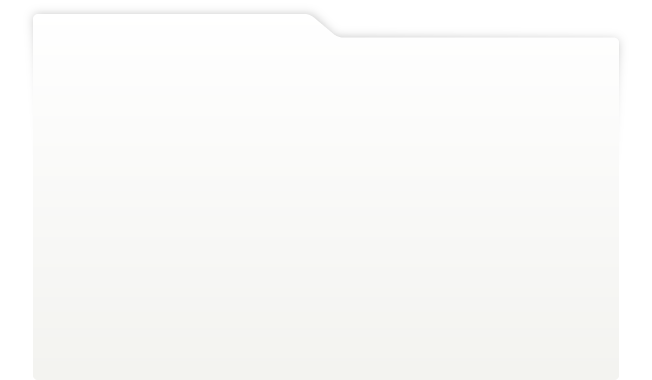
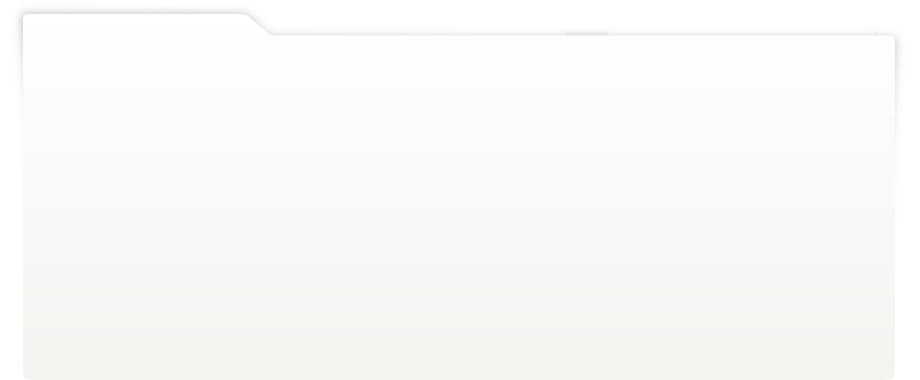
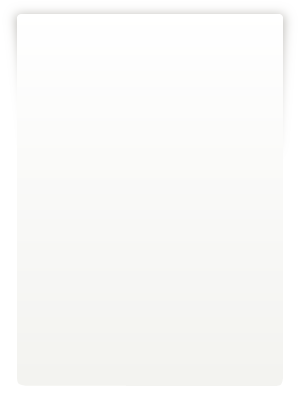
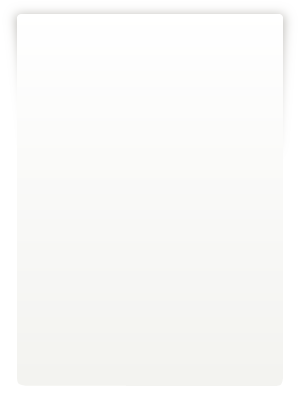
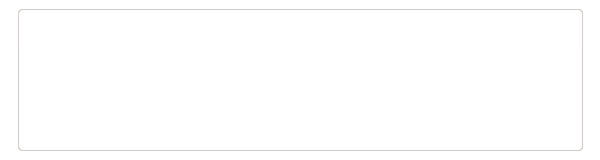
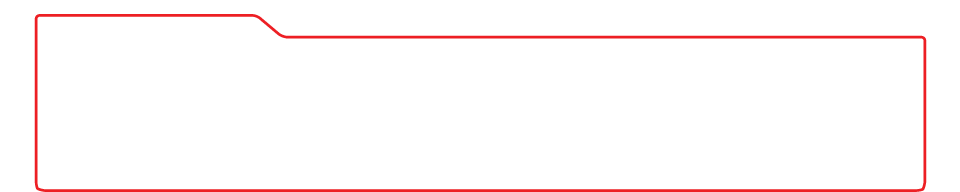
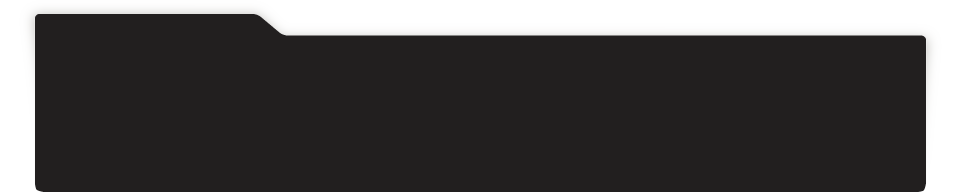
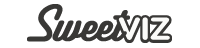
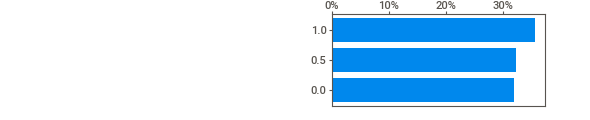
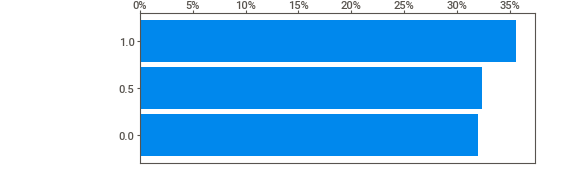
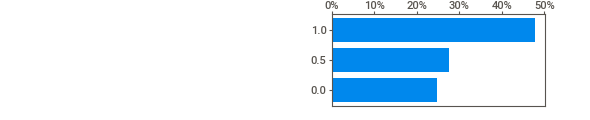
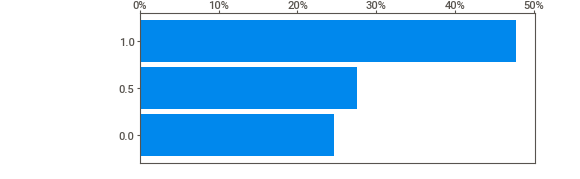
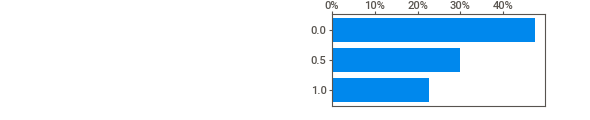
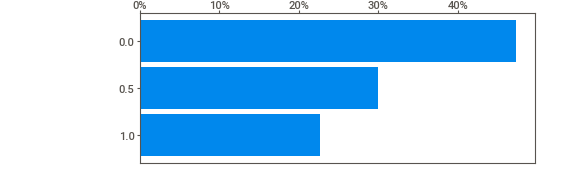
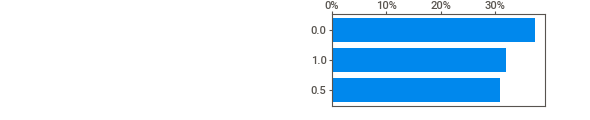
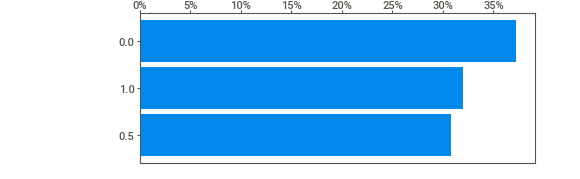
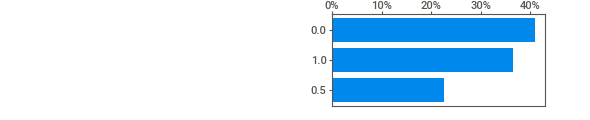
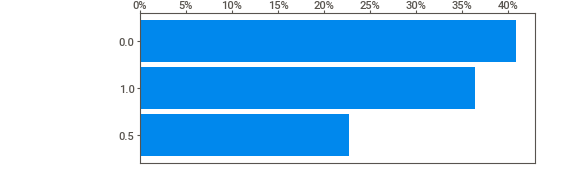
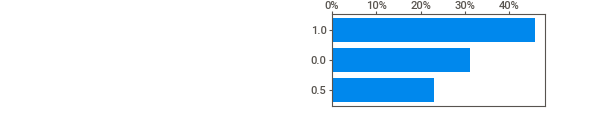
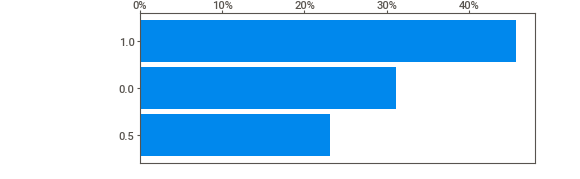
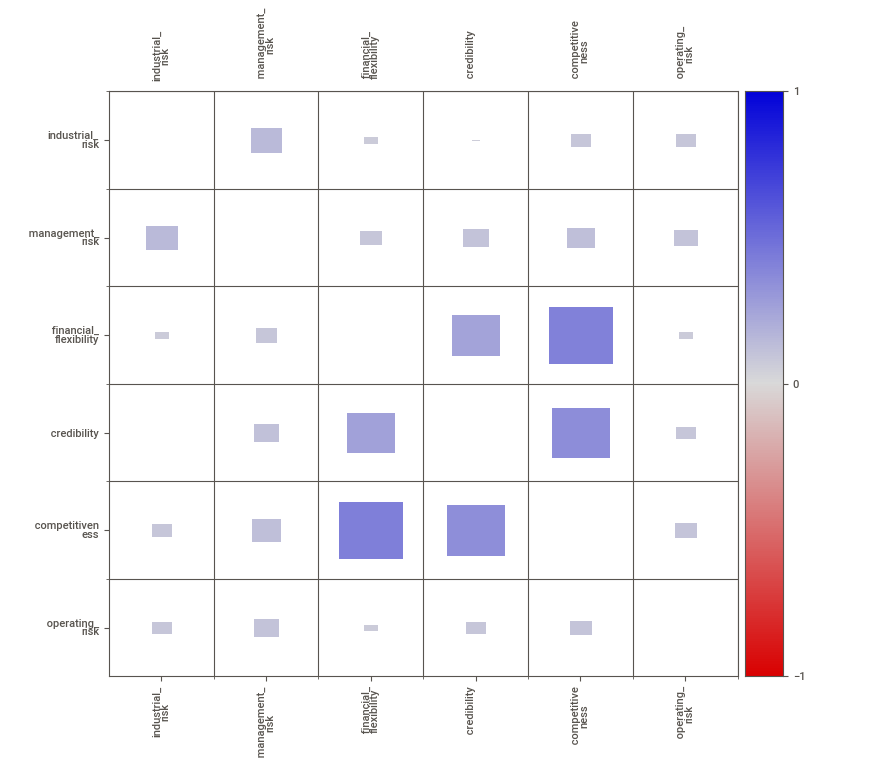
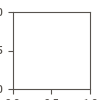

In [25]:
sweet_report = sv.analyze(data1)
sweet_report.show_notebook(layout='vertical' , w=880, h=700, scale=0.8)

**Train Test split Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=18, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
model_names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 1.000000 (0.000000)


In [28]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [29]:
print(f'Test Accuracy: {accuracy_score(Y_test, prediction)}')
print(f'Classification Report: \n {classification_report(Y_test, prediction)}')

Test Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [30]:
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(X_train, Y_train)

ElasticNet(alpha=0.4)

In [32]:
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

X_train = pd.DataFrame(X_train, columns=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk'])

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.2588188306836043


,Columns,Coefficient Estimate
0,industrial_risk,-0.0
1,management_risk,-0.0
2,financial_flexibility,0.0
3,credibility,0.0
4,competitiveness,0.0
5,operating_risk,-0.0
